In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np 
from visibility_graph import visibility_graph
import networkx as nx
import statsmodels.api as sm
import os

ruta = '../AGN/'
edge = '../AGN/edgeList/'

if not os.path.exists(ruta):
    os.makedirs(ruta)

if not os.path.exists(edge):
    os.makedirs(edge)

In [13]:
def lista0 (lista1, lista2):
    while 0 in lista1:
        lista2.pop(lista1.index(0))
        lista1.remove(0)
    return lista1, lista2 

def get_alpha(route,id, li_fit, ls_fit, xlimi, xlims, color, name):
    
    data = f'{route}{id}'
    routeSaved = f'{route}pdf/'
    print(data)
    if not os.path.exists(routeSaved):
        os.makedirs(routeSaved)

    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    print(G)
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    # Plot degree distribution
    a=np.linspace(li_fit,ls_fit,10)
    

    plt.figure(figsize=(6,4))
    plt.plot(x0,y0,color=color,linewidth=0,marker="P",markersize=5,label="data")
    plt.plot(a,(a)*(model.params[1])+model.params[0]*1.,color="k",lw=3,label=r"fit ($\alpha_0={}$)".format(-np.round(model.params[1],2)))
    plt.xlabel(r'$\log_{10}(k)$ (Degree)'); plt.ylabel(r'$\log_{10} P(k)$'); plt.title('Degree Distribution {}'.format(name)); plt.legend(); plt.xlim(xlimi,xlims)
    plt.legend(title=r"$P(k)\sim x^{-\alpha_0}$"); plt.grid(alpha=0.5)
    
    #TODO
    # plt.savefig(routeSaved+f'{id}.pdf',dpi=300,bbox_inches='tight')
    plt.show()

    return -np.round(model.params[1],2)

In [3]:
def get_alpha2(route,id, li_fit, ls_fit):
    
    data = f'{route}{id}'
    routeSaved = f'{route}pdf/'

    if not os.path.exists(routeSaved):
        os.makedirs(routeSaved)

    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    return -np.round(model.params[1],2)

In [4]:
agn = pd.read_csv('../transients/AGN.csv')
agn

,Classification,ID,observation_id,Mag,Magerr,MJD
0,AGN,1201131350584118676,243027,18.1659,0.123111,53861.248036
1,AGN,1105241010704124644,248034,18.2845,0.123897,55351.243227
2,AGN,1105241010704124644,248035,18.7042,0.147686,55351.250643
3,AGN,1105241010704124644,248036,18.7006,0.144998,55270.363788
4,AGN,1105241010704124644,248007,18.7524,0.149635,54981.148784
...,...,...,...,...,...,...
18314,AGN,1412151400324112534,126643,18.2659,0.122766,55920.339365
18315,AGN,1412151400324112534,126642,17.5489,0.095601,55920.330820
18316,AGN,1412151400324112534,126641,17.4576,0.092919,55920.322302
18317,AGN,1412151400324112534,126549,18.2254,0.162114,55206.223335


In [5]:
ids = list(agn['ID'].unique())
print(len(list(agn['ID'].unique())))
print(*ids)


53
1201131350584118676 1105241010704124644 1201211040084125122 1201011210784128966 1111281010144134599 1112241150694114923 1301171260514105921 1004150010694108608 1212091210554119667 1212081120714110802 1210141040144113641 1103021180524113561 1103281350724109732 1203251150614137172 1202181070674127854 1203211040684103351 1202251320404143265 1202251230594123343 1112250011254116827 1206101150804131553 1209171181184108688 1210081320094121285 1205231210814118357 1502081210164117530 1504011150754113788 1505201070594102990 1601281400444102455 1306011120674133862 1004131380744132697 1302071180594109478 1301171290494101134 1205241210764128629 1302141150504102321 1304081290754138475 1303241120234114292 1303011290544123165 1004051040704109194 1304101090824105434 1411201090614109024 1411251150194108707 1312241350384110624 1309281181134139665 1306271260024129130 911251150574137119 1309281150204108337 1405301010634116353 1409011210164107559 1401011090654141413 1405181150504122960 140914007115410182

In [5]:
import random

# Define tu lista

# Obtén una muestra aleatoria de tamaño 5 sin repeticiones
muestra_aleatoria = random.sample(ids, 15)

# Imprime la muestra aleatoria
print("Muestra aleatoria sin repeticiones:", muestra_aleatoria)


Muestra aleatoria sin repeticiones: [1409011210164107559, 1111281010144134599, 1103281350724109732, 1303011290544123165, 1004131380744132697, 1401011090654141413, 1203251150614137172, 1203211040684103351, 1201211040084125122, 1301171290494101134, 1405181150504122960, 1212081120714110802, 1411251150194108707, 1112241150694114923, 1412151400324112534]


##### Función para hacer los datos

In [17]:
#funcion que haga eso de forma automatica

def edgelist(id):

    vec_id = agn[agn['ID'] == id]['Mag']
    graph_id = visibility_graph(vec_id)
    nx.write_edgelist(graph_id, f'{ruta}edgeList/{id}')
    print(f'{ruta}edgeList/{id})


In [7]:
def get_alpha_data(route,id, li_fit, ls_fit, name):
    
    data = f'{edge}{id}'
    
    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    alpha = -np.round(model.params[1],2)
    values = [name,id,alpha]
    
    return values

In [9]:
values = []
for id in ids:
    values.append(get_alpha_data(edge, id, 0.792, 1.416, 'AGN')) 
print(values)

[['AGN', 1201131350584118676, 2.68], ['AGN', 1105241010704124644, 2.05], ['AGN', 1201211040084125122, 2.12], ['AGN', 1201011210784128966, 2.34], ['AGN', 1111281010144134599, 2.31], ['AGN', 1112241150694114923, 2.38], ['AGN', 1301171260514105921, 2.58], ['AGN', 1004150010694108608, 2.09], ['AGN', 1212091210554119667, 2.22], ['AGN', 1212081120714110802, 2.75], ['AGN', 1210141040144113641, 2.35], ['AGN', 1103021180524113561, 2.42], ['AGN', 1103281350724109732, 2.36], ['AGN', 1203251150614137172, 2.13], ['AGN', 1202181070674127854, 1.8], ['AGN', 1203211040684103351, 2.5], ['AGN', 1202251320404143265, 2.62], ['AGN', 1202251230594123343, 2.47], ['AGN', 1112250011254116827, 1.99], ['AGN', 1206101150804131553, 2.45], ['AGN', 1209171181184108688, 2.29], ['AGN', 1210081320094121285, 2.21], ['AGN', 1205231210814118357, 2.06], ['AGN', 1502081210164117530, 2.43], ['AGN', 1504011150754113788, 2.21], ['AGN', 1505201070594102990, 2.55], ['AGN', 1601281400444102455, 2.32], ['AGN', 1306011120674133862, 

In [10]:
import csv 

ruta = '../resultados/prueba.csv'

with open (ruta, mode = 'a', newline = '') as archivo: 
    writer = csv.writer(archivo)

    writer.writerows(values)
    pass

#### Indices de los id's a probar (sacado aleatoreamente)

id1: 4

id2: 51

id3: 7

id4: 22

id5: 15

In [16]:
ids_group =  [1302141150504102321, 1202251320404143265, 1203211040684103351, 1103281350724109732, 1209171181184108688, 
              1409011210164107559, 1303011290544123165, 1302071180594109478, 1309281150204108337, 1306011120674133862, 
              1304101090824105434, 1411251150194108707, 1309281181134139665, 1301171260514105921, 1205241210764128629]

""" id1 = 1201131350584118676
id2 = 1105241010704124644
id3 = 1004150010694108608
id4 = 1205231210814118357
id5 = 1203211040684103351

edgelist(id1)
edgelist(id2)
edgelist(id3)
edgelist(id4)
edgelist(id5) """

for _ in ids:
    edgelist(_)

0       18.1659
304     16.3338
305     16.2649
306     16.4297
307     16.4197
         ...   
2283    17.8377
2284    17.5562
2285    18.0032
2286    17.9884
2287    17.9077
Name: Mag, Length: 320, dtype: float64
1       18.2845
2       18.7042
3       18.7006
4       18.7524
5       18.9527
         ...   
3001    18.5010
3002    18.5066
4133    18.5410
4418    18.4400
4425    18.3344
Name: Mag, Length: 322, dtype: float64
40      19.6221
41      18.8052
43      19.5639
44      18.6209
45      18.6493
         ...   
1834    18.1988
1835    18.4156
1836    18.5176
1837    18.3068
1838    18.0252
Name: Mag, Length: 306, dtype: float64
287     20.3749
288     19.6416
289     21.0689
290     19.7904
291     20.2571
         ...   
3928    19.6713
3929    19.1616
3930    19.2069
3931    19.1384
3932    19.0990
Name: Mag, Length: 326, dtype: float64
573     17.3136
574     17.7647
575     17.3362
576     17.9508
577     17.9080
         ...   
3857    18.0773
3858    18.1029
3859    18.2

In [8]:
#valores obtenidos: 
values_min = [0.61, 0.85, 0.65, 0.72, 0.85, 0.86, 0.85, 0.84, 0.78, 0.825, 0.815, 0.73, 0.77, 0.87, 0.86, ]
values_max = [1.40, 1.355, 1.46, 1.40, 1.47, 1.44, 1.41, 1.415, 1.41, 1.43, 1.37, 1.46, 1.39, 1.40, 1.43, ]
values_alpha = [2.24, 2.77, 2.1, 2.34, 2.18, 2.34, 2.55, 2.62, 2.46, 2.33, 2.69, 2.26, 2.48, 2.64, 2.16, ]

In [9]:
get_alpha = []
new_route = f'{ruta}edgeList/'

for _ in ids: 
    get_alpha.append(get_alpha2(new_route, _, 0.792, 1.416))

print(get_alpha)

[np.float64(2.68), np.float64(2.05), np.float64(2.12), np.float64(2.34), np.float64(2.31), np.float64(2.38), np.float64(2.58), np.float64(2.09), np.float64(2.22), np.float64(2.75), np.float64(2.35), np.float64(2.42), np.float64(2.36), np.float64(2.13), np.float64(1.8), np.float64(2.5), np.float64(2.62), np.float64(2.47), np.float64(1.99), np.float64(2.45), np.float64(2.29), np.float64(2.21), np.float64(2.06), np.float64(2.43), np.float64(2.21), np.float64(2.55), np.float64(2.32), np.float64(2.33), np.float64(2.5), np.float64(2.62), np.float64(2.62), np.float64(2.13), np.float64(2.06), np.float64(2.31), np.float64(2.22), np.float64(2.51), np.float64(2.27), np.float64(2.63), np.float64(2.18), np.float64(2.11), np.float64(2.53), np.float64(2.44), np.float64(2.29), np.float64(2.59), np.float64(2.45), np.float64(2.28), np.float64(2.29), np.float64(2.39), np.float64(2.8), np.float64(2.38), np.float64(1.84), np.float64(2.45), np.float64(2.46)]


In [58]:
#estadisticos: 
import csv 


nombre_archivo = "../AGN/datosAGN.csv"

# Abre el archivo en modo de escritura y especifica el separador (',' por defecto)
with open(nombre_archivo, mode='w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    
    # Escribe cada fila del arreglo en el archivo CSV
    escritor_csv.writerow(ids)
    escritor_csv.writerow(get_alpha)
        

print("Archivo CSV generado exitosamente.")

Archivo CSV generado exitosamente.


In [ ]:
#Datos estadisticos


#Promedio
promedio_AGN = sum(get_alpha)/len(get_alpha)

#desviacion

In [45]:
print(get_alpha2(ruta, ids_group[14], 0.792, 1.416))

2.13


../AGN/1205241210764128629
Graph with 308 nodes and 977 edges


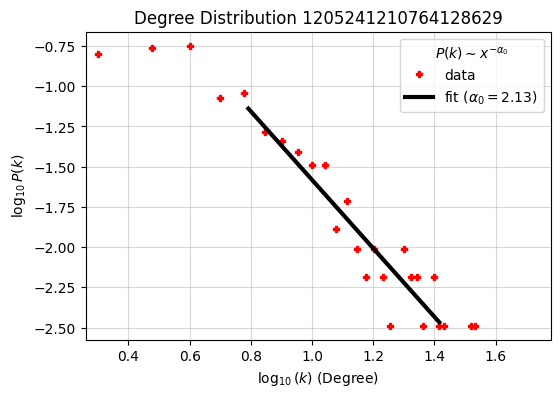

np.float64(2.13)

In [14]:

get_alpha(ruta, ids_group[14], 0.792, 1.416,0.26,1.78, "red", ids_group[14])

#### PRUEBA 1 $\rightarrow$ AGN

ID: 1111281010144134599

In [10]:
#0.85 & 1.34 -> 3.0
#otra opcion: 0.65  & 1.43 -> 2.32 [posible ganadora]
#otra (no creo tanto): 0.72 & 1.42 -> 2.4

# get_alpha(ruta, id1, 0.735,1.42,0.26,1.78, "red", id1)


#### PRUEBA 2 $\rightarrow$ AGN

ID: 1412301010694113096

In [11]:
#0.85 & 1.34 -> 1.58
#otra opcion: 0.65  & 1.398 -> 2.19 [posible ganadora]
#otra: 0.695 & 1.398 -> 2.19 [mismo pero mejor]

# get_alpha(ruta,id2,0.695,1.393,0.3,1.75, "red", id2)

#### PRUEBA 3 $\rightarrow$ AGN

ID: 1004150010694108608

In [12]:
#0.85 & 1.34 -> 2.51
#otra opcion: 0.65  & 1.43 -> 1.98
#otra : 0.71 & 1.5 -> 2.02 [posiblemente ganadora]
#otra (no creo tanto): 0.695 & 1.5 -> 2.0 



# get_alpha(ruta,id3,0.71,1.5,0.3,1.75, "red", id3)

#### PRUEBA 4 $\rightarrow$ AGN

ID: 1205231210814118357

In [13]:

#0.85 & 1.34 -> 2.19
#otra : 0.718 & 1.415 -> 2.18 [posiblemente ganadora]
#otra: 0.695 & 1.398 -> 2.16 



# get_alpha(ruta,id4,0.718,1.398,0.3,1.75, "red", id4)

#### PRUEBA 5 $\rightarrow$ AGN

ID: 1203211040684103351

In [14]:
#0.85 & 1.34 -> 2.38
#otra opcion: 0.65  & 1.43 -> 2.21 [buena opc]


# get_alpha(ruta,id5,0.65,1.43,0.3,1.75, "red", id5)

##### CONCLUSIONES

Después de analizar los 5 AGN de forma aleatorea tuvimos que el rango oscila entre:


Inferior =  0.65 $\rightarrow$ 0.718 
Superior =  1.398 $\rightarrow$ 1.5
con un alpha en un intervalo de [2.02, 2.21]

desviación de: 0.077910205
con una varianza de: 0.00607